In [1]:
ls

 Volume in drive C is Acer
 Volume Serial Number is D45B-9DAD

 Directory of C:\Users\Sirjan Bhalla\Downloads\ML\Supervised Learning\ML Exam projects\2

11-03-2021  03:16 PM    <DIR>          .
11-03-2021  03:16 PM    <DIR>          ..
11-03-2021  03:16 PM    <DIR>          .ipynb_checkpoints
11-03-2021  01:20 AM           721,247 Logical Regression_Sirjan Bhalla_1810991855(Final)-Copy1.ipynb
11-03-2021  01:22 AM           720,433 Logical Regression_Sirjan Bhalla_1810991855.ipynb
09-03-2021  12:17 PM           294,912 LogisticRegressionusingPython_ClassAssessment.pdf
09-03-2021  12:17 PM            38,026 xAPI-Edu-Data.csv
09-03-2021  12:18 PM            14,713 xAPI-Edu-Dataset Information.docx
               5 File(s)      1,789,331 bytes
               3 Dir(s)  211,401,404,416 bytes free


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('xAPI-Edu-Data.csv')
data.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [4]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [5]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
categorical_column = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique())<=50:
        categorical_column.append(column)
        print(f"{column}: {data[column].unique()}")
        print("-------------------------------------------------------------")

gender: ['M' 'F']
-------------------------------------------------------------
NationalITy: ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
-------------------------------------------------------------
PlaceofBirth: ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
-------------------------------------------------------------
StageID: ['lowerlevel' 'MiddleSchool' 'HighSchool']
-------------------------------------------------------------
GradeID: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
-------------------------------------------------------------
SectionID: ['A' 'B' 'C']
-------------------------------------------------------------
Topic: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
-------------------------------------------------

# Answer_1: `Visualizing just the categorical features individually`

In [8]:
data['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

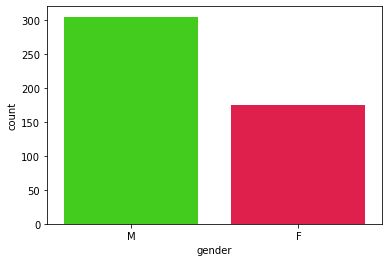

In [9]:
sns.countplot(x='gender', data=data, palette='prism')

### The number of males is almost twice as the number of women

In [10]:
data['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
USA              6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

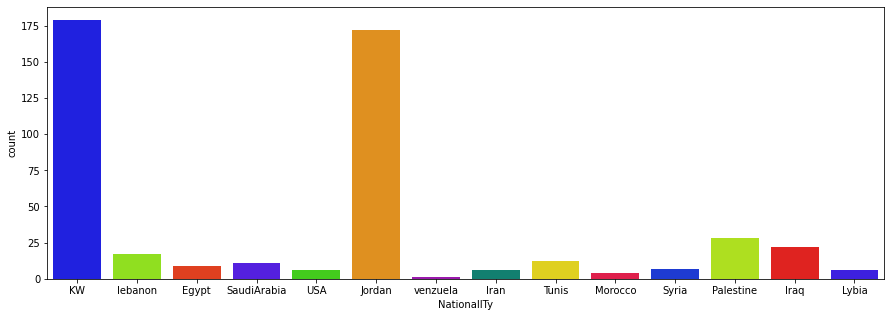

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x='NationalITy', data=data, palette='prism')

### There's a large number of people from Kuwait and Jordon nationality

In [12]:
data['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Lybia            6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

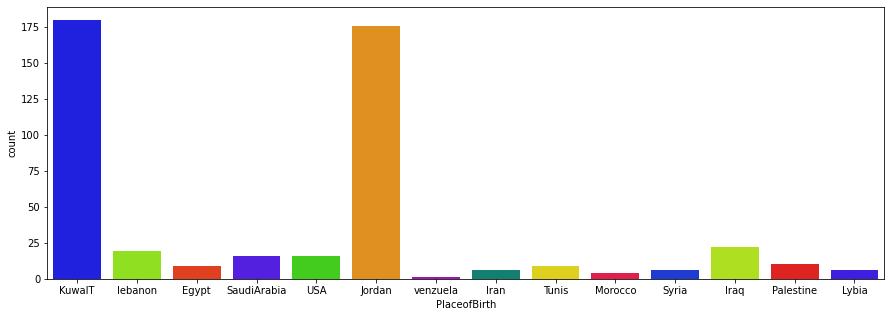

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x='PlaceofBirth', data=data, palette='prism')

### Most people also have their place of birth in Kuwait and Jordan 

In [14]:
print(data.NationalITy == data.PlaceofBirth)

0      False
1      False
2      False
3      False
4      False
       ...  
475     True
476     True
477     True
478     True
479     True
Length: 480, dtype: bool


### This shows that even though Nationality and Place of birth have same attributes there are significant people who have different Place of birth and Nationality

In [15]:
data['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

### Middle School students have the largest population in the dataset

In [16]:
data['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

### Most of the students belong to G-02

In [17]:
data['SectionID'].value_counts()

A    283
B    167
C     30
Name: SectionID, dtype: int64

### Most students are from section A

In [18]:
data['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Geology      24
Chemistry    24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

### IT is the most popular subject

In [19]:
data['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

### There's almost similar division of population for the first and second semester

In [20]:
data['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

### Fathers are responsible for larger number of students

In [21]:
data['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

### Mostly parents answered the surveys though the data is almost equally distributed

In [22]:
data['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

### Most of the parents are satisfied by the school

In [23]:
data['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

### Most students were usually present for most of the days

In [24]:
data['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

### Most students have Middle-level performance. There is almost similar number high and low level of performance.

# Answer_2: `Categorical features in relation to each other`

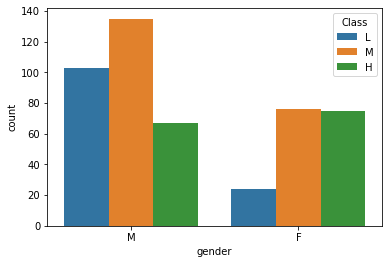

In [25]:
sns.countplot(x='gender', hue='Class', data=data,hue_order=['L','M','H'])

#### Males have mostly in the middle and low level performance whereas females have middle and high level performance

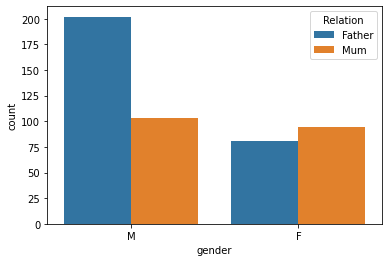

In [26]:
sns.countplot(x='gender', hue='Relation', data=data)

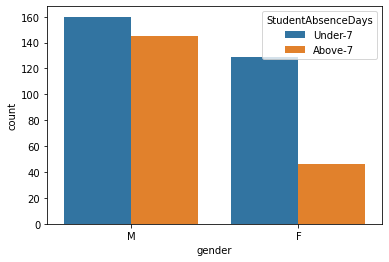

In [27]:
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data)

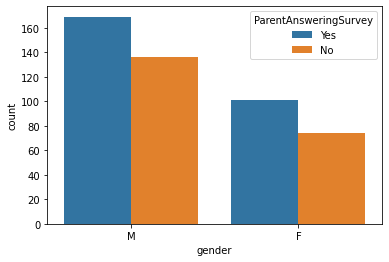

In [28]:
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data)

### no proper inference when comparing gender with relation, student absent days and parent answering survey

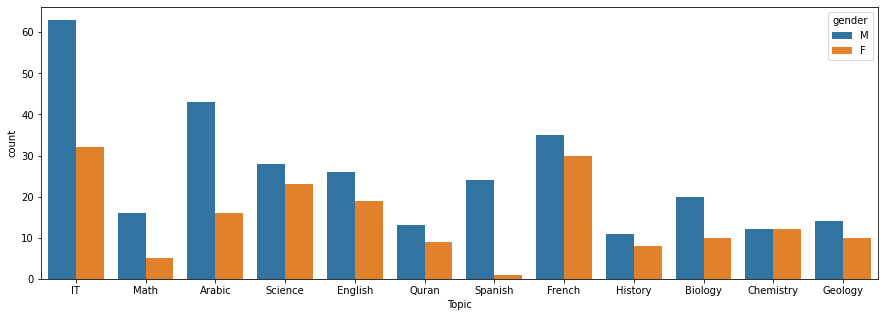

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='Topic', hue='gender', data=data)

### No a gender bias into choosing subjects almost similar distributions, even though there is a notable ratio in IT but we can't conclue for all subjects

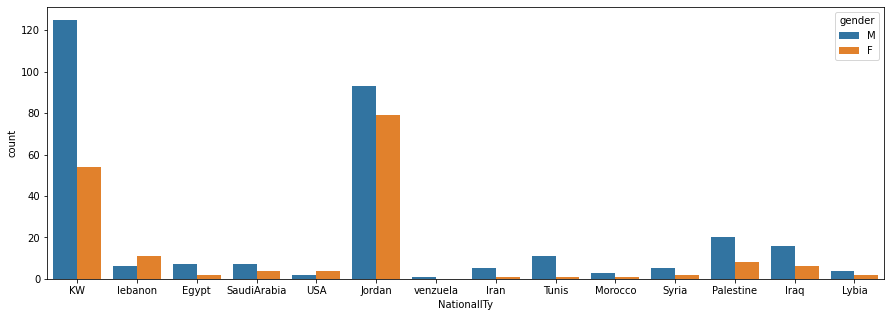

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='NationalITy', hue='gender', data=data)

### keeping in mind that males are twice as females, we can't make notable inference from this graph

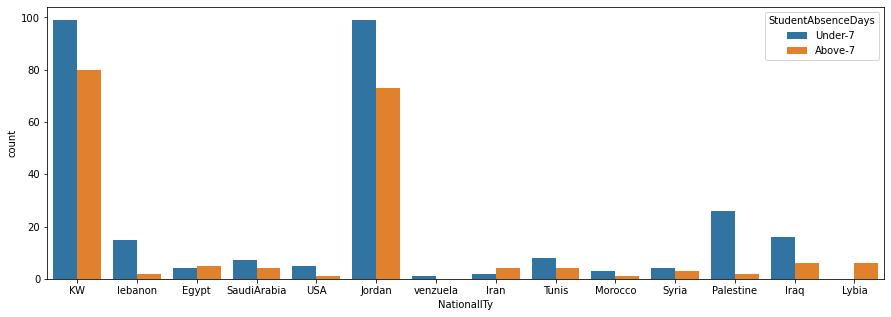

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x='NationalITy', hue='StudentAbsenceDays', data=data)

### in most of the countries students have been absent for under 7 days. 

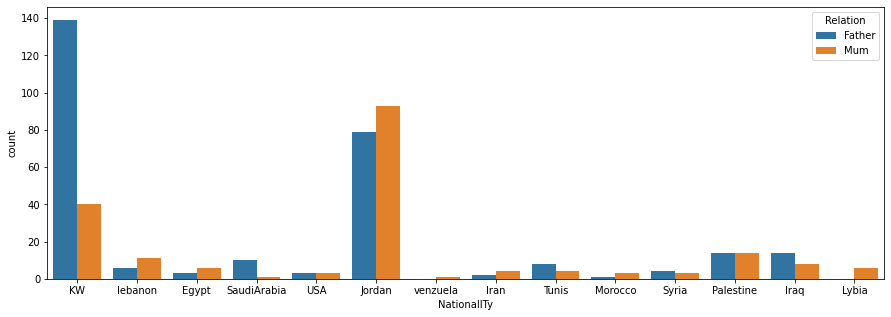

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='NationalITy', hue='Relation', data=data)

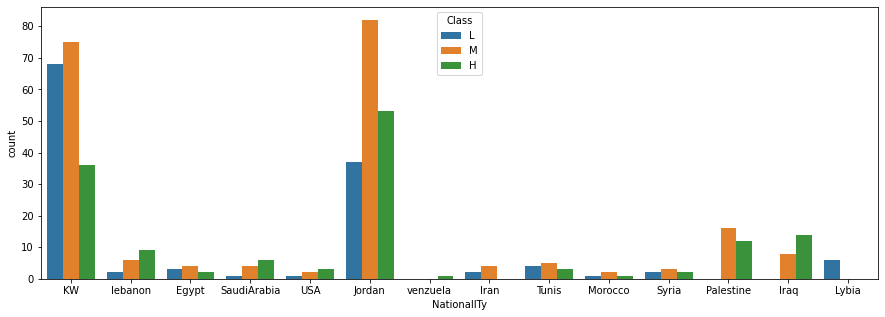

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x='NationalITy', hue='Class', data=data, hue_order=['L','M','H'])

### no proper inference for above 2 graphs

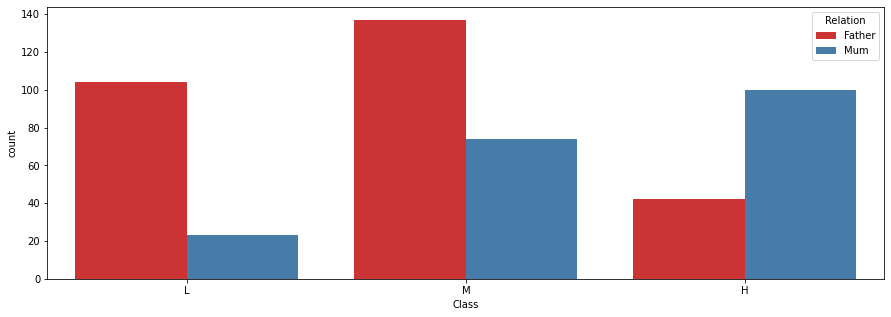

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x='Class', hue='Relation', data=data, order=['L','M','H'], palette='Set1')

### Students who's mother were responsible had higher chances of preforming well.

# Answer_3: `Visualizing categorical variables with numerical variables`

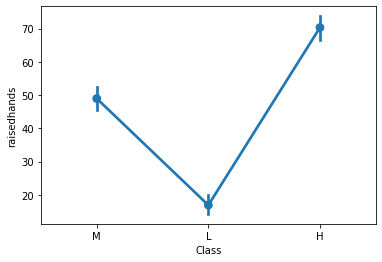

In [35]:
sns.pointplot(x='Class', y='raisedhands', data=data)

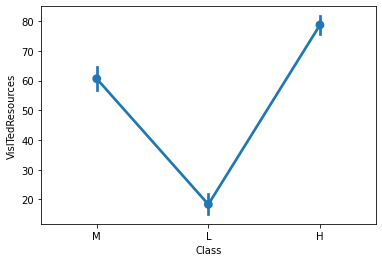

In [36]:
sns.pointplot(x='Class', y='VisITedResources', data=data)

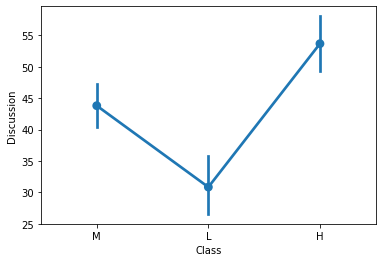

In [37]:
sns.pointplot(x='Class', y='Discussion', data=data)


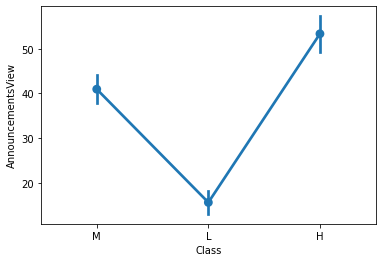

In [38]:
sns.pointplot(x='Class', y='AnnouncementsView', data=data)

### High school students more involved in the classroom activities generally score high marks

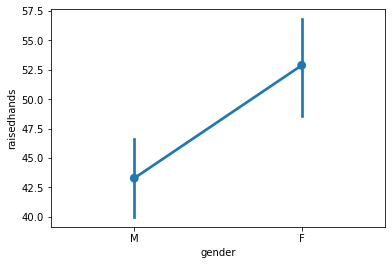

In [39]:
sns.pointplot(x='gender', y='raisedhands', data=data)

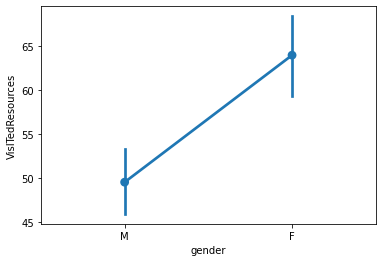

In [40]:
sns.pointplot(x='gender', y='VisITedResources', data=data)

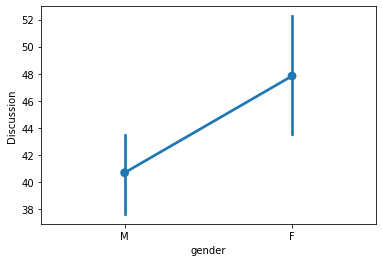

In [41]:
sns.pointplot(x='gender', y='Discussion', data=data)

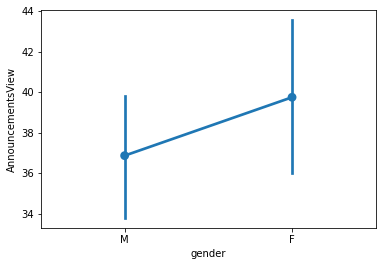

In [42]:
sns.pointplot(x='gender', y='AnnouncementsView', data=data)

### females slightly engage more in classroom activies

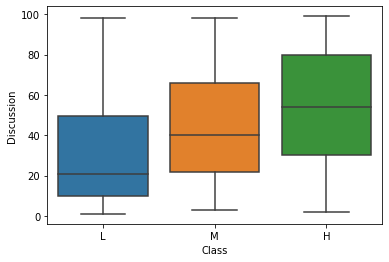

In [43]:
sns.boxplot(x='Class', y='Discussion', data=data, order=['L','M','H'])

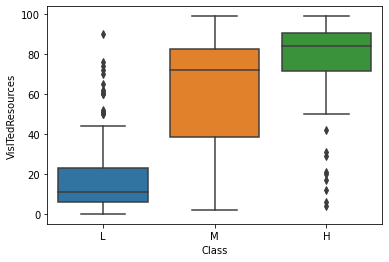

In [44]:
sns.boxplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'])

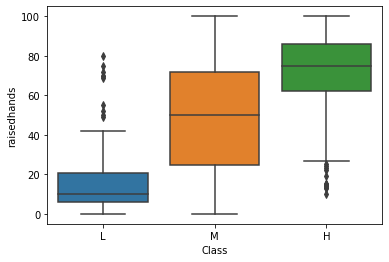

In [45]:
sns.boxplot(x='Class', y='raisedhands', data=data, order=['L','M','H'])

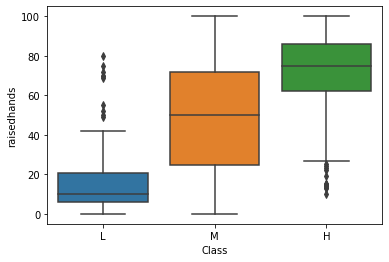

In [46]:
sns.boxplot(x='Class', y='raisedhands', data=data, order=['L','M','H'])

### Discussions and Visiting resources don't necessary mean good grades since we see presence of outliers

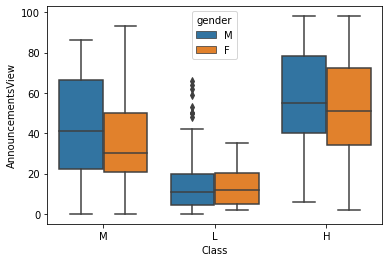

In [47]:
sns.boxplot(x='Class', y='AnnouncementsView', hue='gender', data=data)


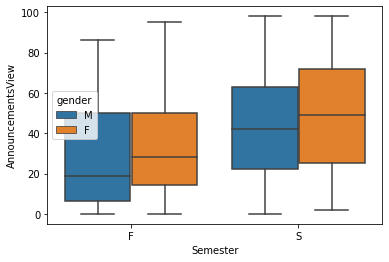

In [48]:
sns.boxplot(x='Semester', y='AnnouncementsView', hue='gender', data=data)

### From above two graphs we can see that students work harder in the second semester

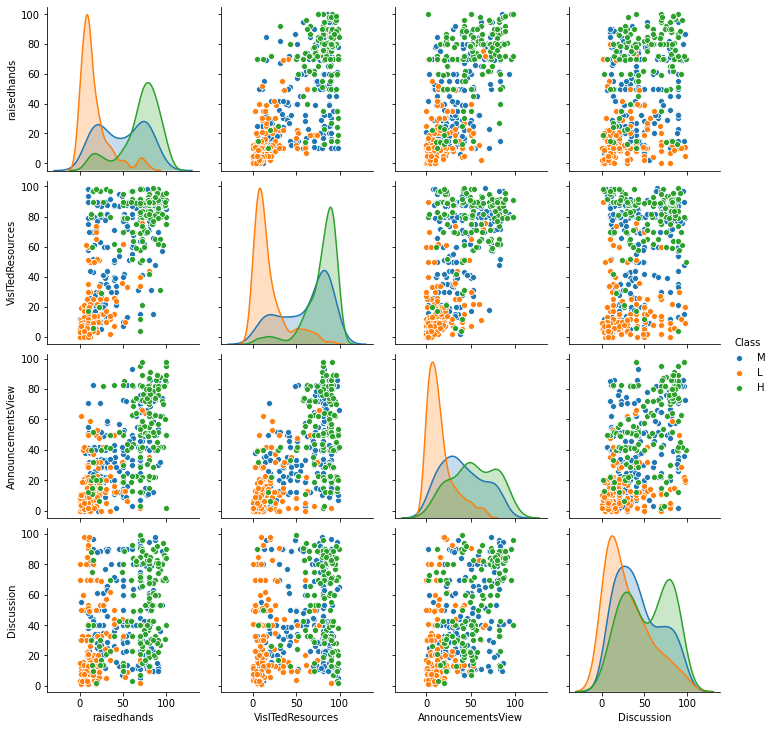

In [49]:
sns.pairplot(data,hue='Class', diag_kind='kde')

In [50]:
data.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


### Almost all numerical variable show good correlation to each other

# Answer_4: `Factors that leads to get low grades of the students`

### From studying all the graphs above we noted some factors that could have led to low grades:
#### => Students who had low attendence in class 
#### => Students who participated less in classroom activities such as raising hand, discussions, visiting resources and viewing announcements

# Answer_5:` Building classification model and classification report`

In [51]:
data.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [52]:
data = data.drop(['NationalITy'], axis=1)

In [53]:
data = data.drop(['SectionID'], axis=1)

In [54]:
data.head(5)

,gender,PlaceofBirth,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,lowerlevel,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KuwaIT,lowerlevel,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KuwaIT,lowerlevel,G-04,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KuwaIT,lowerlevel,G-04,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KuwaIT,lowerlevel,G-04,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [55]:
data_dummy = pd.get_dummies(data, columns=['gender', 'ParentAnsweringSurvey','PlaceofBirth','StageID','GradeID','Topic','Semester','Relation',
                                           'ParentschoolSatisfaction','StudentAbsenceDays'])
print(data_dummy.shape)
data_dummy.head()

(480, 56)


,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,PlaceofBirth_Egypt,...,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,M,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,1
1,20,20,3,25,M,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,1
2,10,7,0,30,L,0,1,1,0,0,...,0,0,1,0,1,0,1,0,1,0
3,30,25,5,35,L,0,1,1,0,0,...,0,0,1,0,1,0,1,0,1,0
4,40,50,12,50,M,0,1,1,0,0,...,0,0,1,0,1,0,1,0,1,0


In [56]:
y = data['Class']
y = pd.DataFrame(y)


y.tail(5)

,Class
475,L
476,M
477,M
478,L
479,L


In [57]:
# y=pd.get_dummies(y, columns=['Class'])
y['Class']= y['Class'].replace({'L':0,'M':1,'H':2 })
y

,Class
0,1
1,1
2,0
3,0
4,1
...,...
475,0
476,1
477,1
478,0


In [58]:
X = data_dummy.drop(['Class'], axis=1)
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,PlaceofBirth_Egypt,PlaceofBirth_Iran,...,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
1,20,20,3,25,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
2,10,7,0,30,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,1,0,0,0,...,0,0,0,1,1,0,1,0,1,0
476,50,77,14,28,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
477,55,74,25,29,1,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
478,30,17,14,57,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [60]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(360, 55)
(360, 1)
(120, 55)
(120, 1)


In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = model.predict(X_test)

In [63]:
score = accuracy_score(y_test,y_pred)

In [64]:
c_report = classification_report(y_test,y_pred)

In [65]:
score

0.85

In [66]:
print(c_report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        35
           1       0.85      0.82      0.83        55
           2       0.74      0.87      0.80        30

    accuracy                           0.85       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.86      0.85      0.85       120

